In [33]:
%pylab inline
import biff
from scipy import special
import pygadgetreader
import reading_snapshots

Populating the interactive namespace from numpy and matplotlib


In [481]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)


In [34]:
def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

In [2]:
MWLMC5_pos = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pos', 'dm') 
MWLMC5_mass = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'mass', 'dm') 

Returning DM    Positions
Returning DM    Mass


In [14]:
MWLMC5_post = reading_snapshots.read_MW_snap_com_coordinates('../data/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=False)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Loading MW particles and LMC particles


In [16]:
MWLMC5_post[0][:,0]

array([ 2866.93481445,  2834.68725586,  2908.26171875, ...,    -8.75286293,
          -8.7856617 ,    -8.55785847], dtype=float32)

In [17]:
r_mwlmc5 = (MWLMC5_pos[0][:,0]**2 + MWLMC5_pos[0][:,1]**2 + MWLMC5_pos[0][:,2]**2)**0.5
index_cut = np.where(r_mwlmc5 < 300)[0]

In [18]:
S_mwlmc, T_mwlmc = biff.compute_coeffs_discrete(np.double(MWLMC5_post[0][index_cut]),
                                                np.double(MWLMC5_mass[index_cut]), 
                                                20, 20, skip_m=False, r_s=40.8)

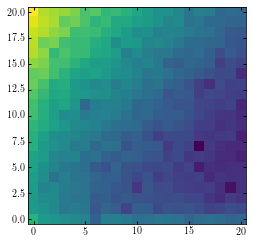

In [32]:
imshow(np.log10(np.abs(S_mwlmc[:,:,0].T)), origin='lower')

In [44]:
for i in range(20):
    savetxt('MWLMC5_Snlm_20_20_b1_m{:02d}.txt'.format(i), S_mwlmc[:,:,i])

In [45]:
A_nl_array = np.zeros((21, 21))
for j in range(21):
    for i in range(21):
        A_nl_array[j][i] = Anl(j, i)

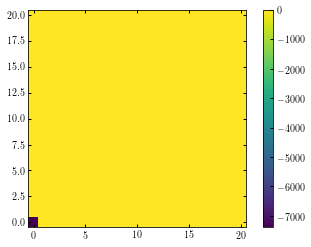

In [61]:
imshow((S_mwlmc[:,:,0].T**2/A_nl_array.T), origin='lower')
colorbar()

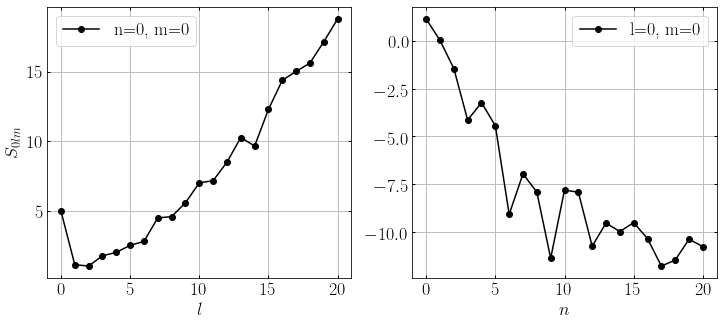

In [508]:
figure(figsize=(12, 5))

subplot(1, 2, 1)

plot(np.log(np.abs(S_mwlmc[0,:,0])),  '-o', label='n=0, m=0', c='k')
    
ylabel(r'$S_{0lm}$')
xlabel('$l$')
grid()
legend()
subplot(1, 2, 2)
plot(np.log(np.abs(S_mwlmc[:,1,0])), '-o', label='l=0, m=0', c='k')
xlabel('$n$')
grid()
legend()

savefig('MWLMC_S_coeff.pdf', bbox_inches='tight')

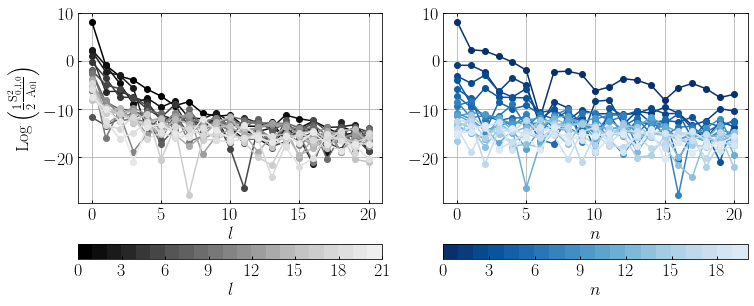

In [503]:
figure(figsize=(12, 5))

c1 = np.arange(0., 20 + 1)
cmap1 = plt.get_cmap("Greys_r", len(c1)+3)
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

c2 = np.arange(1., 20 + 1)
cmap2 = plt.get_cmap("Blues_r", len(c2)+3)
norm2 = matplotlib.colors.BoundaryNorm(np.arange(len(c2)+1),len(c2))
sm2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
sm2.set_array([])

subplot(1, 2, 1)

for i in range(20):
    plot(np.log(np.abs(0.5*S_mwlmc[i,:,0]**2/A_nl_array[i])),  '-o', c=cmap1(i))
cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$l$')
ylabel(r'$\rm{Log} \left( \frac{1}{2} \frac{S_{0, l, 0}^2}{A_{0l}} \right)$')
xlabel('$l$')
grid()

subplot(1, 2, 2)
for i in range(20):
    plot(np.log(np.abs(0.5*S_mwlmc[:,i,0]**2/A_nl_array[:,i])), '-o', c=cmap2(i))
cbar = colorbar(sm2, orientation='horizontal')
cbar.set_label('$n$')
xlabel('$n$')
grid()

savefig('MWLMC_S_coeff_energy.pdf', bbox_inches='tight')

In [430]:
y_grid = np.arange(-300, 300, 5)
z_grid = np.arange(-300, 300, 5)
y_grid, z_grid = meshgrid(y_grid, z_grid)

y_grid_2 = np.arange(-300, 300, 5)
z_grid_2 = np.arange(-300, 300, 5)
y_grid_2, z_grid_2 = meshgrid(y_grid_2, z_grid_2)

In [431]:
pot_mwlmc = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc, 
                           T_mwlmc, G=1,
                           M=1, r_s=40.8)

In [432]:
rho_mwlmc = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc, 
                           T_mwlmc,
                           M=1, r_s=40.8)

In [433]:
S_mwlmc_000 = np.zeros(shape(S_mwlmc))
S_mwlmc_000[0,0,0] = S_mwlmc[0,0,0]
T_mwlmc_000 = np.zeros(shape(T_mwlmc))
T_mwlmc_000[0,0,0] = T_mwlmc[0,0,0]


In [434]:
S_mwlmc_per = np.copy(S_mwlmc)
S_mwlmc_per[0,0,0] = 0
T_mwlmc_per = np.copy(T_mwlmc)
T_mwlmc_per[0,0,0] = 0

In [435]:
pot_mwlmc_base = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000, G=1,
                           M=1, r_s=40.8)

In [436]:
rho_mwlmc_base = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc_000, 
                           T_mwlmc_000, 
                           M=1, r_s=40.8)

In [437]:
pot_mwlmc_per = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_per, 
                           T_mwlmc_per, G=1,
                           M=1, r_s=40.8)

In [438]:
rho_mwlmc_per = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc_per, 
                           T_mwlmc_per,
                           M=1, r_s=40.8)

In [439]:
pot_matrix = reshape(pot_mwlmc, (120, 120))
pot_matrix_base = reshape(pot_mwlmc_base, (120, 120))
pot_matrix_per = reshape(pot_mwlmc_per, (120, 120))

In [440]:
rho_matrix = reshape(rho_mwlmc, (120, 120))
rho_matrix_base = reshape(rho_mwlmc_base, (120, 120))
rho_matrix_per = reshape(rho_mwlmc_per, (120, 120))

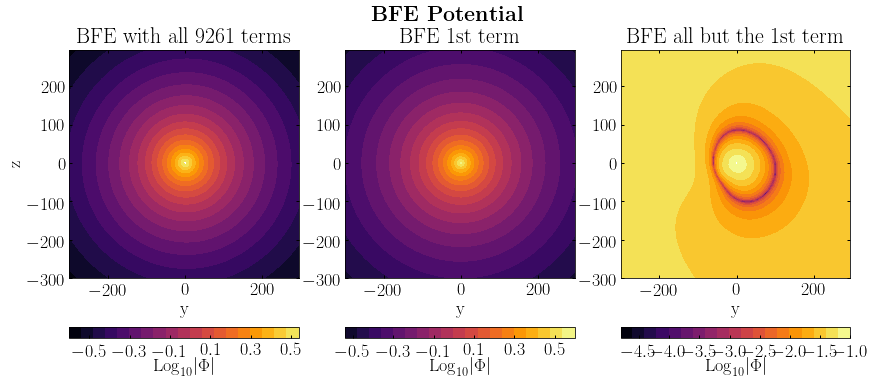

In [531]:
fig = figure(figsize=(14, 6))
fig.suptitle(r'$\textbf{BFE Potential}$') 



subplot(1, 3, 1)
title('BFE with all 9261 terms')
contourf(y_grid, z_grid, np.log10(np.abs(pot_matrix.T)), 20, vmin=-0.6, vmax=0.6, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\Phi|$')
cbar.set_ticks(np.arange(-0.5, 0.51, 0.2))
xlabel('y')
ylabel('z')

subplot(1, 3, 2)
title('BFE 1st term')
contourf(y_grid, z_grid, np.log10(np.abs(pot_matrix_base.T)), 20, vmin=-0.61, vmax=0.61, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\Phi|$')
cbar.set_ticks(np.arange(-0.5, 0.51, 0.2))
xlabel('y')

subplot(1, 3, 3)
title('BFE all but the 1st term')
contourf(y_grid, z_grid, np.log10(np.abs(pot_matrix_per.T)), 20, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\Phi|$')
cbar.set_ticks(np.arange(-4.5, 0, 0.5))
xlabel('y')
savefig('BFE_potential.pdf', bbox_inches='tight')

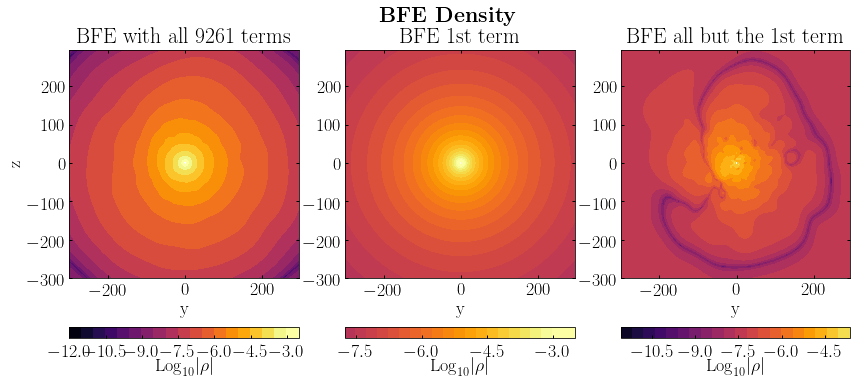

In [532]:
fig = figure(figsize=(14, 6))

fig.suptitle(r'$\textbf{BFE Density}$') 

subplot(1, 3, 1)
title('BFE with all 9261 terms')
contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix.T)), 20, vmin=-12, vmax=-3, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\rho|$')
cbar.set_ticks(np.arange(-12, -2.9, 1.5))
xlabel('y')
ylabel('z')

subplot(1, 3, 2)
title('BFE 1st term')
contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix_base.T)), 20, vmin=-12, vmax=-3, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\rho|$')
cbar.set_ticks(np.arange(-12, -2.9, 1.5))
xlabel('y')

subplot(1, 3, 3)
title('BFE all but the 1st term')
contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix_per.T)), 20, vmin=-12, vmax=-3, cmap='inferno')
cbar = colorbar(orientation='horizontal')
cbar.set_label(r'$\rm{Log}_{10} |\rho|$')
cbar.set_ticks(np.arange(-12, -2.9, 1.5))
xlabel('y')

savefig('BFE_density.pdf', bbox_inches='tight')

In [260]:
A_nl_matrix = np.zeros((21, 21, 21))
for i in range(21):
    A_nl_matrix[:,:,i] = A_nl_array

In [262]:
U_nlm = 0.5*(S_mwlmc**2 + T_mwlmc**2)/A_nl_matrix

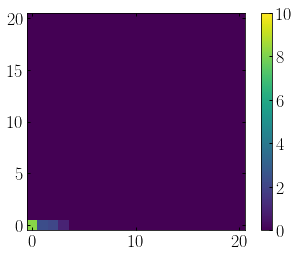

In [416]:
imshow(np.log(np.abs(U_nlm[:,:,0].T)), origin='lower', vmin=0, vmax=10)
colorbar()

In [534]:
for i in range(0, 11):
    index_discard = np.where(np.log10(np.abs(U_nlm))<-i)
    S_mwlmc_opt = np.copy(S_mwlmc)
    S_mwlmc_opt[index_discard] = 0

    T_mwlmc_opt = np.copy(T_mwlmc)
    T_mwlmc_opt[index_discard] = 0
    N_coeff = len(np.where(S_mwlmc_opt!=0)[0])
    S_mwlmc_opt[0,0,0] = 0
    T_mwlmc_opt[0,0,0] = 0


    rho_opt = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                               S_mwlmc_opt, 
                               T_mwlmc_opt,
                               M=1, r_s=40.8)

    rho_matrix_opt = reshape(rho_opt, (120, 120))

    figure(figsize=(6,6))
    title(r'BFE density with {} coefficients ($Log (U)\leq-${})'.format(N_coeff, i))
    contourf(y_grid_2, z_grid_2, np.log10(np.abs(rho_matrix_opt.T)), 20, cmap='inferno', vmin=-12, vmax=-3)
    xlabel('y')
    ylabel('z')
    savefig('BFE_density_N_coeff_{}_not_zero_term.pdf'.format(N_coeff), bbox_inches='tight')
    close()


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [400]:
pot_opt = biff.potential(np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T), 
                           S_mwlmc_opt, 
                           T_mwlmc_opt, G=1,
                           M=1, r_s=40.8)

In [422]:
rho_opt = biff.density(np.ascontiguousarray(np.array([np.zeros(len(y_grid_2.flatten())), y_grid_2.flatten(), z_grid_2.flatten()]).T), 
                           S_mwlmc_opt, 
                           T_mwlmc_opt,
                           M=1, r_s=40.8)

In [412]:
pot_matrix_opt = reshape(pot_opt, (600, 600))

In [423]:
rho_matrix_opt = reshape(rho_opt, (60, 60))

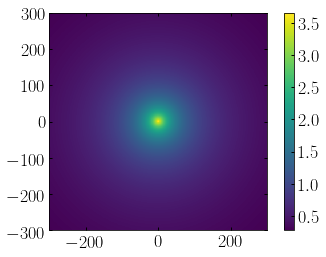

In [414]:
imshow((np.abs(pot_matrix_opt)), extent=[-300, 300, -300, 300])
colorbar()